# Firstly we import packages and load data 📚


In [1]:
import pandas as pd
import re 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()#To set seaborn style
import plotly.express as px

In [2]:
df=pd.read_csv("/kaggle/input/population-total/population_total.csv")
df=pd.melt(df,id_vars=['country'],var_name='year',value_name='population')
df

,country,year,population
0,Afghanistan,1800,3280000
1,Albania,1800,410000
2,Algeria,1800,2500000
3,Andorra,1800,2650
4,Angola,1800,1570000
...,...,...,...
58690,Venezuela,2100,41600000
58691,Vietnam,2100,108000000
58692,Yemen,2100,53500000
58693,Zambia,2100,94400000


# 2- Data Wrangling 🔎🧹

# Summary of data Wrangling Steps we will do🧹 :- 


### Step 1: Creat replace_pop_count(value) function 
```python
def replace_pop_count(value):
    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    else:
        return float(value)
  ```
### Step 2: change the data type for year column to datetime & country to Categorical
```python
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['country'] = df['country'].astype('category')
```
### Step 3: Make sure there is no duplicates and NAN Values
```python
df.isna().sum()
df.duplicated().sum()
```
There is no nan values and any duplicates in our data , Now our Data is ready for EDA 

In [3]:
def replace_pop_count(value):
    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    else:
        return float(value)

df['population'] = df['population'].astype(str).apply(replace_pop_count)


In [4]:
df['country'] = df['country'].astype('category')

In [5]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [6]:
df.isna().sum()

country       0
year          0
population    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58695 entries, 0 to 58694
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     58695 non-null  category      
 1   year        58695 non-null  datetime64[ns]
 2   population  58695 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 1.0 MB


# Now Our data is ready for Exploratery Data Analysis `EDA` 🔎
### Questions to answer :- 
- How does the global population trend look from 1800 to 2100?
- What is the top five highest population growth rates and the top 5 countries with the highest population decline rates?
- What is the total population for the top 10 countries based on their population sums and the lowest ten ?


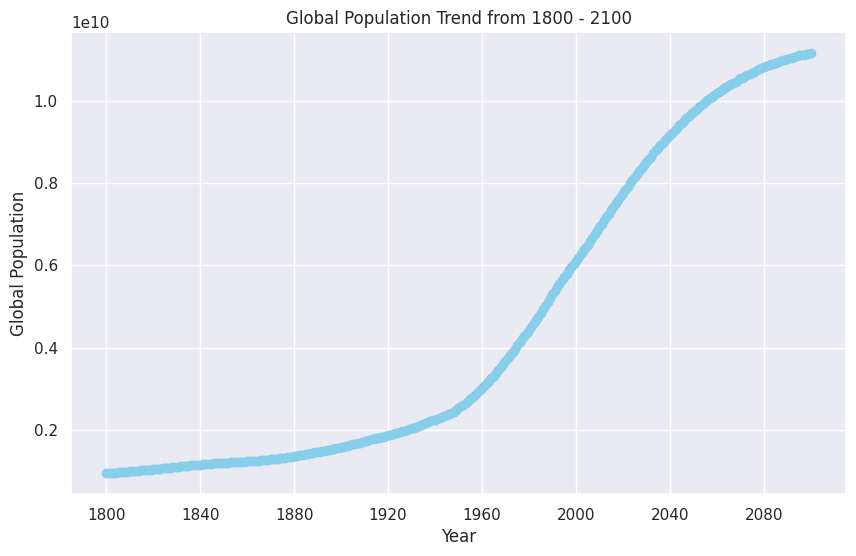

In [9]:
# global population trend from 1800 to 2100
population_trend = df.groupby('year')['population'].sum()
plt.figure(figsize=(10, 6))
plt.plot(population_trend.index, population_trend.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Global Population')
plt.title('Global Population Trend from 1800 - 2100')
plt.grid(True)
plt.show()

## Observations from 1800 to 1920
From the data analysis of global population trends between 1800 and 1920:
- The increase in global population during this period appears relatively moderate.
- There was a gradual or steady growth in population during this time frame.
- No significant spikes or rapid increases in population were observed.

## Observations from 1920 to 2080
Contrastingly, between 1920 and 2080:
- A noticeable shift in the global population trend occurred, showcasing rapid and substantial population growth.
- There was a pronounced acceleration in the rate of population increase during this period.
- The growth rate appeared to escalate significantly compared to earlier years.

### some Insights or reasons for that :
The data suggests that while the global population exhibited relatively modest growth from 1800 to 1920, a notable shift occurred afterward, showing an unprecedented and rapid increase in global population figures from 1920 to 2080. This significant acceleration in population growth during the latter period could be indicative of various factors, including advancements in healthcare, technology, improved living conditions, and changes in birth rates contributing to this marked demographic shift.


In [10]:
country_population_changes = df.groupby('country')['population'].agg(lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100)

# Sort countries based on population change rate
countries_growth = country_population_changes.sort_values(ascending=False)
countries_decline = country_population_changes.sort_values()

# top 5 countries with the highest population growth
print("Highest population growth rates:")
print(countries_growth.head())

# top 5 countries with the highest population decline
print("\nHighest population decline rates:")
print(countries_decline.head())



Highest population growth rates:
country
United Arab Emirates    36715.920398
Qatar                   28056.028369
Brunei                  22763.849765
Singapore               18000.000000
Niger                   15383.870968
Name: population, dtype: float64

Highest population decline rates:
country
Holy See          -11.823204
Ireland            57.389163
Czech Republic     61.050725
Slovak Republic    78.971963
Hungary            82.571429
Name: population, dtype: float64


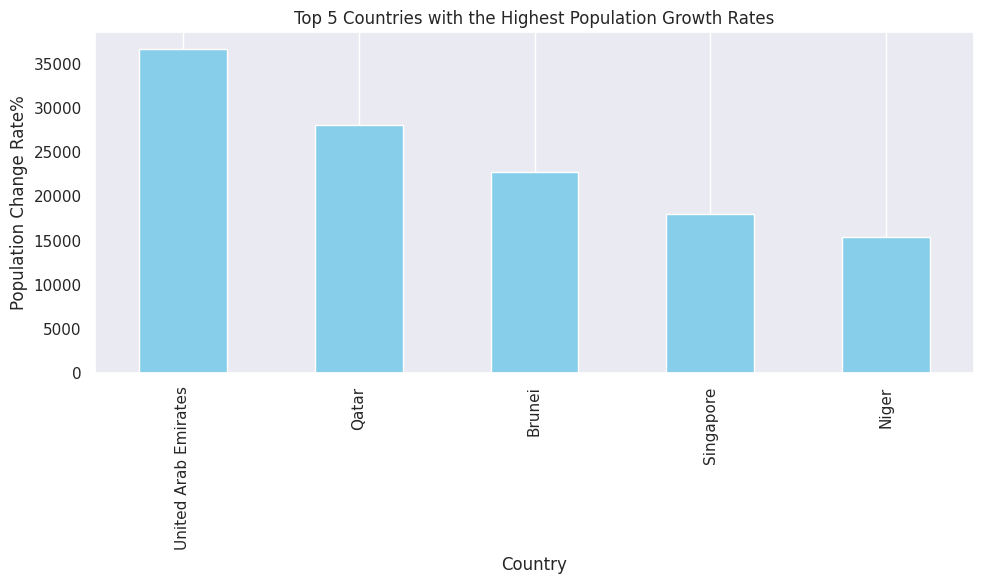

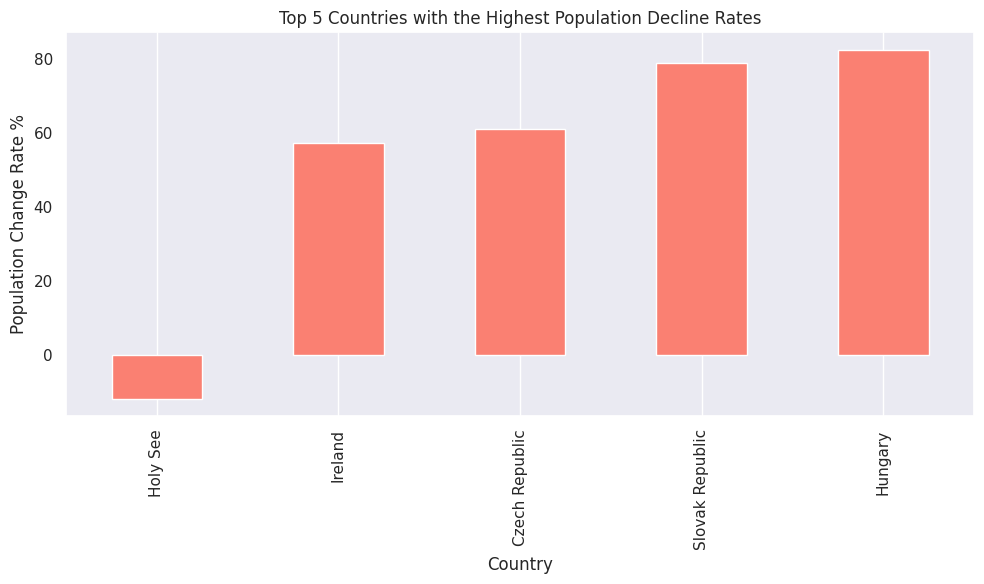

In [11]:
# top 5 countries with the highest population growth rates
plt.figure(figsize=(10, 6))
countries_growth.head(5).plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Population Change Rate%')
plt.title('Top 5 Countries with the Highest Population Growth Rates')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# top 5 countries with the highest population decline rates
plt.figure(figsize=(10, 6))
countries_decline.head(5).plot(kind='bar', color='salmon')
plt.xlabel('Country')
plt.ylabel('Population Change Rate %')
plt.title('Top 5 Countries with the Highest Population Decline Rates')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Insights for Top 5 Countries with Highest Population Growth Rates:

### United Arab Emirates (UAE)
- **Population Growth Rate:** 36,715.92%
- **Key Factors:** Attracted by economic opportunities, the UAE has experienced a remarkable population surge mainly due to a robust economy, extensive employment opportunities, and policies encouraging expatriate workforce inflow.

### Qatar
- **Population Growth Rate:** 28,056.03%
- **Drivers:** Qatar's flourishing economy, primarily reliant on oil and gas, has attracted a significant expatriate workforce contributing to the rapid population surge.
- **Challenges:** Coping with the demographic shift poses challenges in maintaining infrastructure development, social services, and cultural assimilation.

### Brunei
- **Population Growth Rate:** 22,763.85%
- **Reasons:** Economic prosperity, driven by oil and gas revenues, has enticed expatriates, leading to a notable increase in the population.
- **Implications:** Managing population growth while sustaining economic stability remains a key challenge.

## Insights for Top 5 Countries with Highest Population Decline Rates:

### Holy See
- **Population Decline Rate:** -11.82%
- **Unique Situation:** The Holy See, Vatican City, faces challenges with low birth rates and a small resident population, leading to a decline.

### Ireland
- **Population Decline Rate:** 57.39%
- **Factors:** Economic changes, emigration trends, and societal shifts contribute to Ireland's population decline.

### Czech Republic
- **Population Decline Rate:** 61.05%
- **Challenges:** Aging population, low fertility rates, and emigration pose demographic challenges.


## Key Takeaways:
- **Diverse Factors:** Factors driving population growth vary from economic opportunities, immigration policies, natural population growth to demographic changes.
- **Challenges:** Balancing infrastructure development, societal integration, and resource management are critical for countries experiencing rapid population growth.
- **Aging Populations:** Countries with population decline face challenges related to aging demographics, emigration, and low fertility rates that affect economic and social dynamics.


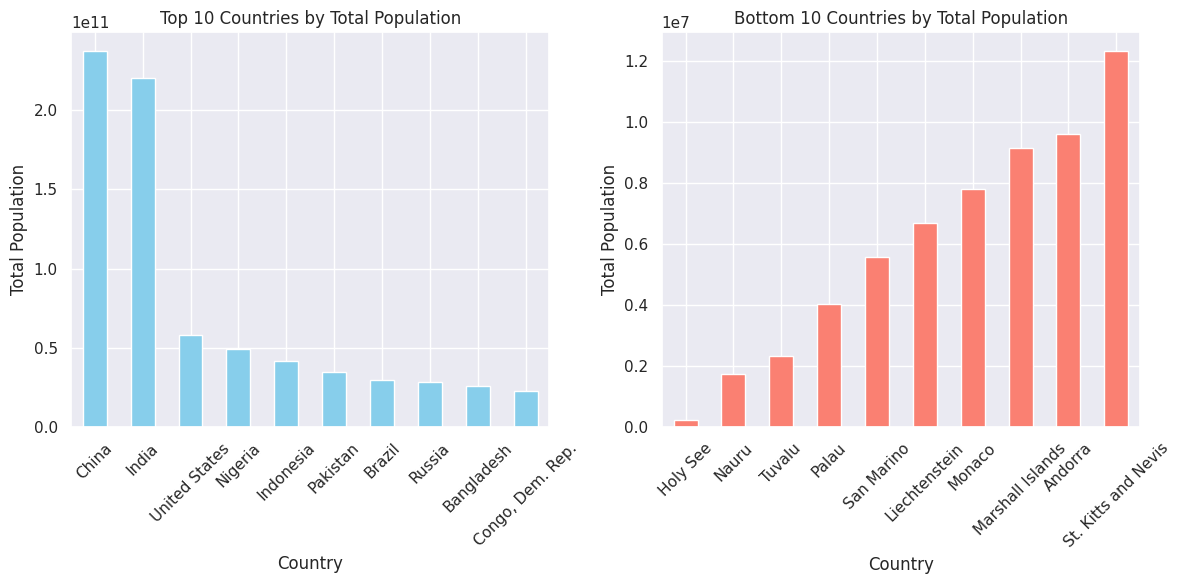

In [12]:
top_10 = df.groupby('country')['population'].sum().nlargest(10)
bottom_10 = df.groupby('country')['population'].sum().nsmallest(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_10.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Population')
plt.title('Top 10 Countries by Total Population')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
bottom_10.plot(kind='bar', color='salmon')
plt.xlabel('Country')
plt.ylabel('Total Population')
plt.title('Bottom 10 Countries by Total Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Top 10 Countries by Total Population


### Observations:
- **Dominance of Large Populations:** The top countries by total population predominantly consist of populous nations like China, India, and the United States, each with billions in population count.
- **Representation of Diverse Continents:** Nations from Asia (China, India, Indonesia, Pakistan, Bangladesh), Africa (Nigeria, Congo), Americas (United States, Brazil), and Europe (Russia) appear in the top 10, reflecting global demographic distribution.

## Bottom 10 Countries by Total Population

### Observations:
- **Representation of Small Nations:** The bottom 10 consists of small, often island nations with significantly smaller population counts, with the smallest being the Holy See (Vatican City).
- **Predominance of Microstates:** Several microstates and small territories like Nauru, Tuvalu, and Monaco appear among the countries with the smallest populations.


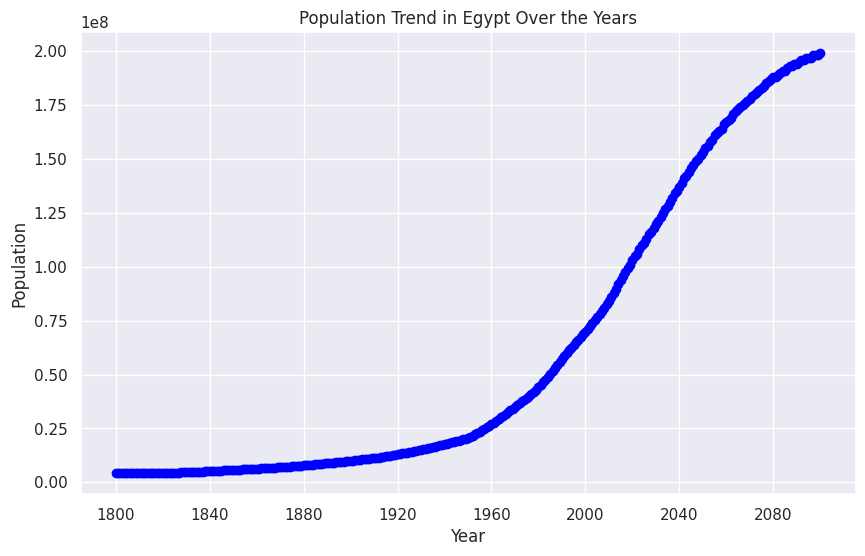

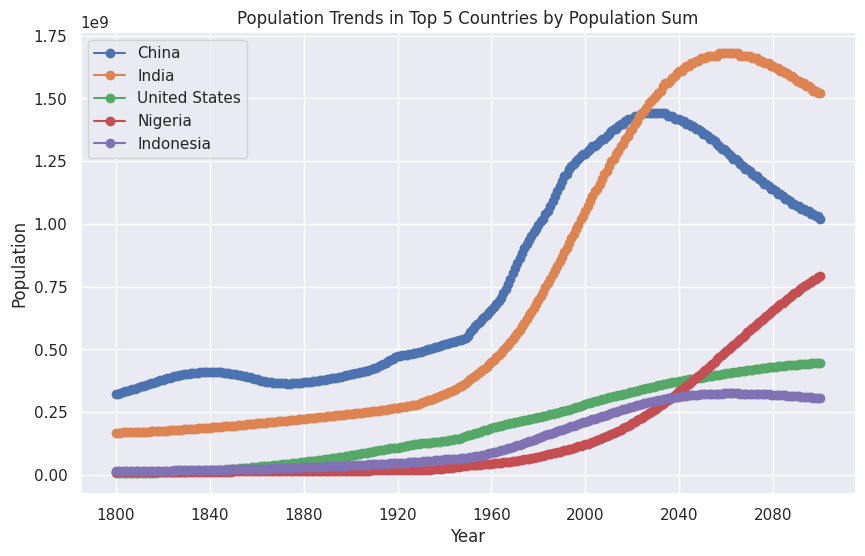

In [13]:
# data for Egypt alone
egypt_data = df[df['country'] == 'Egypt']

# Line plot for Egypt's population over the years
plt.figure(figsize=(10, 6))
plt.plot(egypt_data['year'], egypt_data['population'], marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend in Egypt Over the Years')
plt.grid(True)
plt.show()


# Get top 5 countries by population sum
top_5_countries = df.groupby('country')['population'].sum().nlargest(5).index

# Filter data for the top 5 countries
top_5_df = df[df['country'].isin(top_5_countries)]

# Line plot for the top 5 countries' population sums
plt.figure(figsize=(10, 6))
for country in top_5_countries:
    country_data = top_5_df[top_5_df['country'] == country]
    plt.plot(country_data['year'], country_data['population'], marker='o', linestyle='-', label=country)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends in Top 5 Countries by Population Sum')
plt.legend()
plt.grid(True)
plt.show()



## Population Trends Observation:

### Egypt's Population Trend:
The population trend in Egypt showcases a relatively consistent population count from 1800 to around 1960, demonstrating minimal variations or rapid growth during this period. However, a significant shift occurred after 1960, indicating a noticeable increase in population growth rates. Post-1960, Egypt experienced rapid and continuous population growth, with the growth trend showing no signs of deceleration.

### Top Five Countries by Population Sum:
Contrastingly, the top five countries with the highest population sums exhibit substantial total populations. However, these nations did not show similarly high growth rates in comparison to Egypt. Despite having large population counts, the growth rates for these top five countries remained relatively stable without displaying the rapid increases witnessed in Egypt post-1960.

### Key Insights:
- Egypt's population trend reflects a distinctive shift in growth rates, marking a significant increase after 1960, while the top countries by population sum maintained consistent, albeit large, population counts without substantial growth rate fluctuations.
- The divergence between total population size and growth rate signifies a unique demographic dynamic, highlighting the importance of assessing both population sums and growth rates to capture distinct population trends.


# Highest growth rate VS Highest Population sum

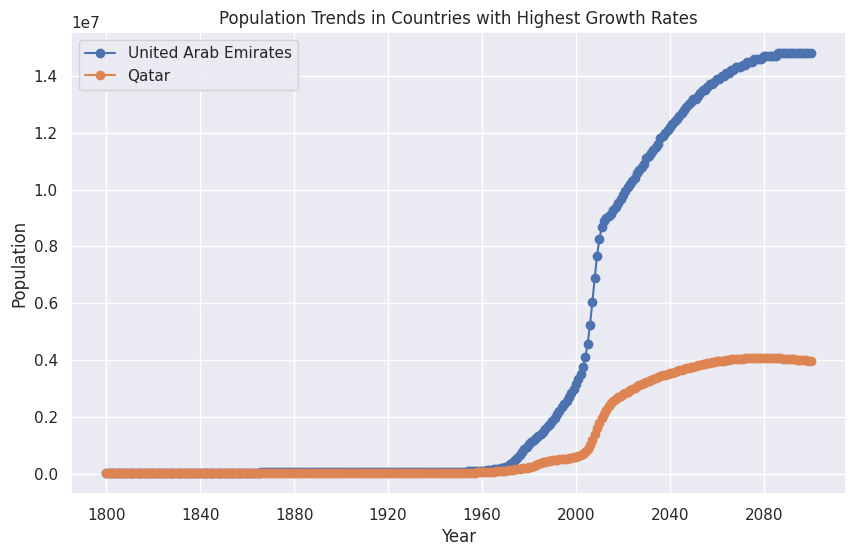

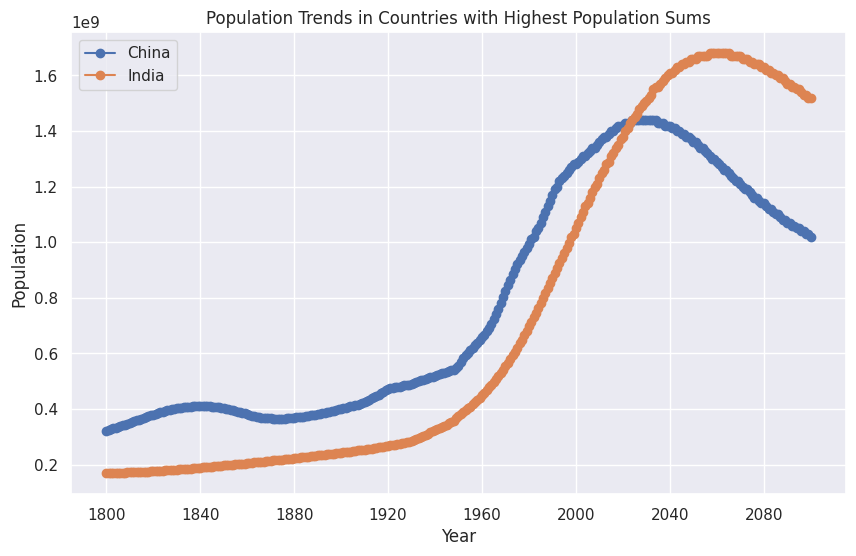

In [14]:
highest_growth_countries = ['United Arab Emirates', 'Qatar']
highest_growth_data = df[df['country'].isin(highest_growth_countries)]

# Line plot for countries
plt.figure(figsize=(10, 6))
for country in highest_growth_countries:
    country_data = highest_growth_data[highest_growth_data['country'] == country]
    plt.plot(country_data['year'], country_data['population'], marker='o', linestyle='-', label=country)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends in Countries with Highest Growth Rates')
plt.legend()
plt.grid(True)
plt.show()

# countries with highest population
highest_population_countries = ['China', 'India']
highest_population_data = df[df['country'].isin(highest_population_countries)]

# Line plot for countries 
plt.figure(figsize=(10, 6))
for country in highest_population_countries:
    country_data = highest_population_data[highest_population_data['country'] == country]
    plt.plot(country_data['year'], country_data['population'], marker='o', linestyle='-', label=country)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends in Countries with Highest Population Sums')
plt.legend()
plt.grid(True)
plt.show()


## Observation: 

Upon analyzing the population growth curves for various countries, distinct patterns emerge between those exhibiting the highest growth rates and those with the largest population sums.

### Highest Growth Rate Countries (UAE and Qatar)

The population growth curves for the United Arab Emirates (UAE) and Qatar present a consistent and steady upward trend without apparent decline or decay. Both countries showcase remarkable stability in their population growth, characterized by a sustained increase without significant fluctuations or declines. This trend highlights their exceptional ability to maintain consistent population growth rates over the analyzed period.

### Population Sum Trends for Top Countries

Conversely, when examining countries with the highest population sums, a contrasting observation arises. While these countries exhibit substantial population sizes, their growth curves display fluctuations involving periods of both rapid increase and subsequent decay or stabilization.

In [15]:
##################################

## Conclusion: Understanding Global Population Dynamics

The analysis of global population trends spanning from 1800 to 2100 reveals intriguing patterns, diverse growth trajectories, and distinctive demographic dynamics across different countries and time periods.

### Global Population Trends:
The historical examination of global population trends between 1800 and 1920 indicates a relatively moderate increase with gradual, steady growth. However, a pronounced shift emerges from 1920 to 2080, demonstrating an unprecedented acceleration in global population growth rates. This transformation, marked by rapid and substantial increases, signifies a pivotal period, likely influenced by advancements in healthcare, technology, and shifts in birth rates, contributing to this remarkable demographic shift.

### Top Population Growth and Decline Rates:
Examining the top five countries with the highest population growth rates reveals remarkable surges, notably in the United Arab Emirates (UAE) and Qatar. These nations witnessed exponential growth attributed to robust economies, policies attracting expatriate workforces, and economic prosperity driven by oil revenues. Conversely, countries experiencing population decline, such as the Holy See and Ireland, grapple with challenges related to low birth rates, emigration trends, and societal shifts affecting their demographics.

### Analysis of Top and Bottom Populated Countries:
The assessment of the top 10 countries by population sums showcases dominance by populous nations like China, India, and the United States, representing diverse continents. In contrast, the bottom 10 countries feature smaller, often island nations with significantly fewer populations. Notably, Egypt's population trend illustrates a unique shift, with a relatively consistent count until the 1960s, followed by a notable surge in growth rates.

### Key Insights and Implications:
The divergence between population size and growth rates emphasizes the necessity of considering both aspects to comprehend distinct demographic dynamics. The observed trends underscore the significance of economic factors, immigration policies, societal changes, and resource management in shaping population growth and decline, highlighting the complexities involved in managing evolving demographic landscapes.

In conclusion, the analysis of global population trends reveals a complex interplay of factors influencing demographic shifts, necessitating a nuanced understanding to address challenges and opportunities associated with changing population dynamics.
